## Reading and understanding Data

    -Importing data using panda library 
    -Understanding structure of the data

In [1]:
import numpy as np
import pandas as pd

In [39]:
adv = pd.read_csv("advertising.csv")
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [40]:
adv.shape

(200, 4)

In [41]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [42]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Step 2: Visualising Data

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns

<AxesSubplot:xlabel='TV', ylabel='Sales'>

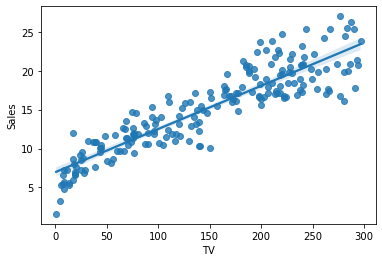

In [44]:
sns.regplot(x='TV', y='Sales', data=adv)


<AxesSubplot:xlabel='Radio', ylabel='Sales'>

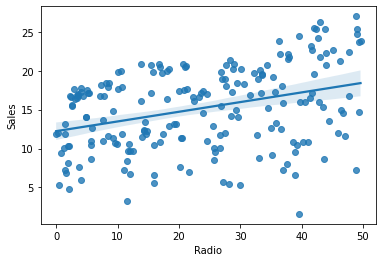

In [45]:
sns.regplot(x='Radio', y='Sales', data=adv)


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

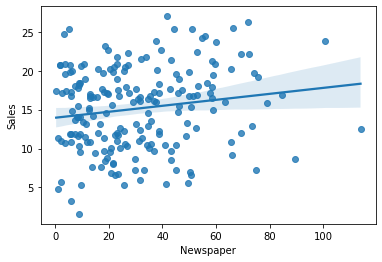

In [46]:
sns.regplot(x='Newspaper', y='Sales', data=adv)

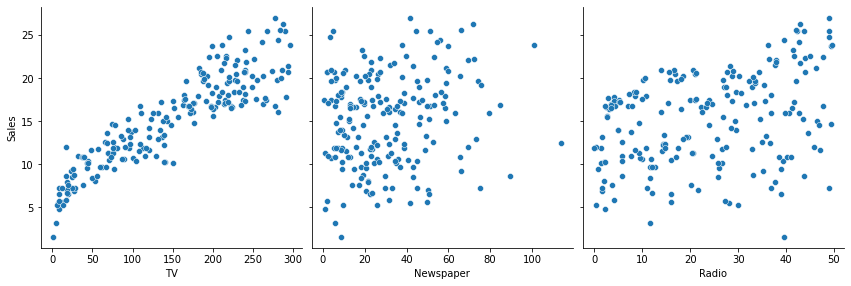

In [47]:
sns.pairplot(adv, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',height=4, aspect=1, kind='scatter')
plt.show()

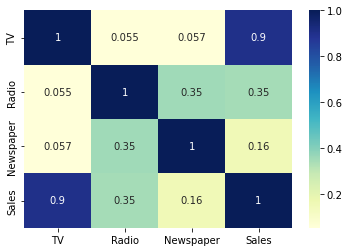

In [48]:
sns.heatmap(adv.corr(),  cmap="YlGnBu",annot = True)
plt.show()

## Step 3: Performing Simple Linear Regression
    Equation of linear regression

     - y is the response
     - c is the intercept
     - m1 is the coefficient for the first feature
     - mn is the coefficient for the nth feature
In our case:
y = c + m1 x TV


The m  values are called the model coefficients or model parameters.

In [49]:
X = adv['TV']
y = adv['Sales']

In [50]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train.shape


(140,)

In [51]:
X_test.shape


(60,)

In [52]:
y_train.shape


(140,)

In [53]:
y_test.shape

(60,)

### Building linear model

In [54]:
import statsmodels.api as sm

In [55]:

# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [56]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [57]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [58]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params


const    6.948683
TV       0.054546
dtype: float64

In [59]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.52e-52
Time:                        13:04:22   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

#### Looking at some key statistics from the summary
The values we are concerned with are -

    -The coefficients and significance (p-values)
    -R-squared
    -F statistic and its significance
##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

##### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

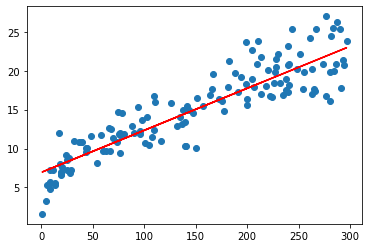

In [60]:
#Sales = 6.9487  + 0.0545  * X_train
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487 + 0.054*X_train, 'r')
plt.show()

### Step 4: Residual analysis

#### Distribution of the error terms
    - We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [61]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\shipr\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


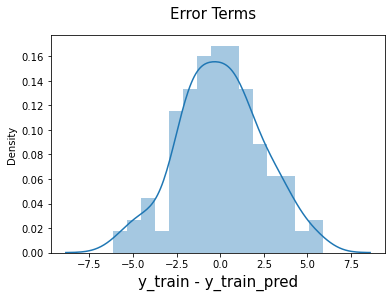

In [64]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

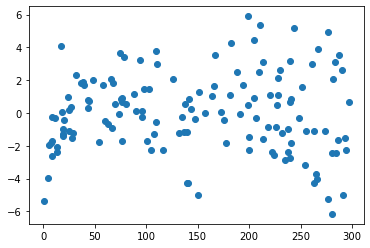

In [65]:
plt.scatter(X_train,res)
plt.show()

### Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [66]:

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [67]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.0192960089662333

In [71]:
r_squared = r2_score(y_test, y_pred)
r_squared


0.7921031601245657

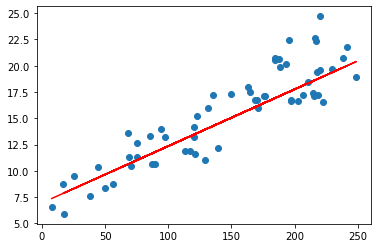

In [72]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

## Linear Regression using linear_model in sklearn

In [73]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [74]:

X_train_lm.shape

(140,)

In [78]:
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [79]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [83]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train)

LinearRegression()

In [81]:
print(lm.intercept_)
print(lm.coef_)

6.94868320000136
[0.05454575]


In [84]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [87]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8157933136480388
0.792103160124566
